# Hitansh Agarwal
# Registration No.: 230957218
# Roll No.: 73
# Week 1

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import chi2_contingency

In [43]:
#Exercise 1
df = pd.read_csv("Titanic.csv")

In [44]:
#Question 1
df.set_index("PassengerId", inplace=True)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [45]:
#Question 2
missing_values = df[['Age', 'Embarked', 'Cabin']].isnull()
missing_values

,Age,Embarked,Cabin
PassengerId,,,
1,False,False,True
2,False,False,False
3,False,False,True
4,False,False,False
5,False,False,True
...,...,...,...
887,False,False,True
888,False,False,False
889,True,False,True


In [46]:
#Question 3
object_and_number = df.select_dtypes(include = ['object','number'])
object_and_number.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [47]:
#Question 4
survived = df['Survived'].sum()
total_passengers = df['Survived'].count()
print("Total Percentage of Passengers who survived:", (survived / total_passengers * 100))

Total Percentage of Passengers who survived: 38.38383838383838


In [48]:
#Question 5
gender_survival_rate = df.groupby('Sex')['Survived'].mean() * 100
gender_survival_rate

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

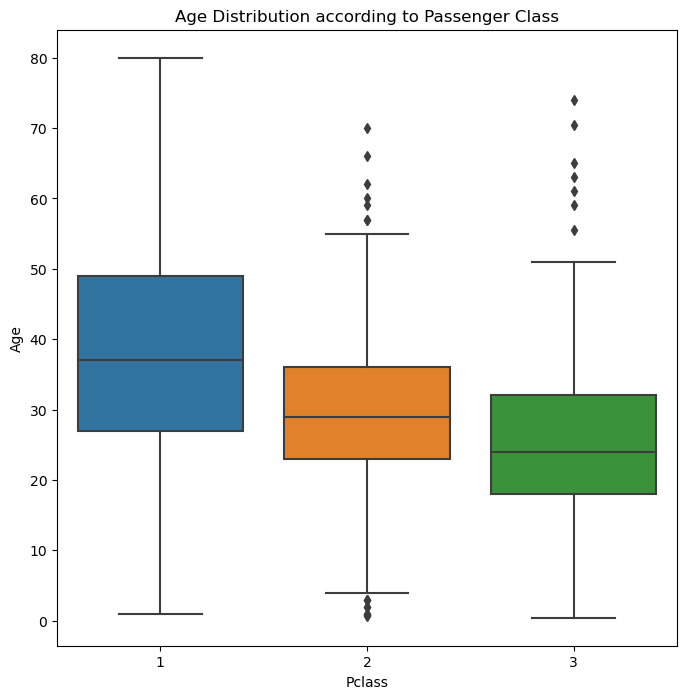

In [49]:
#Question 6
age_of_passengers = df.groupby('Pclass')['Age'].mean()
age_of_passengers
plt.figure(figsize = (8, 8))
sns.boxplot(x = 'Pclass', y = 'Age', data = df)
plt.title("Age Distribution according to Passenger Class")
plt.show()

In [50]:
#Question 7
df['family'] = df['SibSp'] + df['Parch'] + 1
family = df[df['family'] > 2]
family

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family
PassengerId,,,,,,,,,,,,
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,5
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,3
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,3
14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S,7
17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q,6
...,...,...,...,...,...,...,...,...,...,...,...,...
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,11
870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S,3
872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,3


In [51]:
#Question 8
categorical_columns = ['Pclass', 'Sex', 'Embarked', 'SibSp', 'Parch']
chi_square_results = {}

for column in categorical_columns:
    contingency_table = pd.crosstab(df[column], df['Survived'])
    chi2_stat, p_val, dof, ex = stats.chi2_contingency(contingency_table)
    chi_square_results[column] = p_val
chi_square_significant = {col: p_val for col, p_val in chi_square_results.items() if p_val < 0.05}
print(chi_square_significant,"\n")

#T-test for continuous vars
continuous_columns = ['Age', 'Fare']
t_test_results = {}

for column in continuous_columns:
    survived = df[df['Survived'] == 1][column]
    not_survived = df[df['Survived'] == 0][column]
    t_stat, p_val = stats.ttest_ind(survived.dropna(), not_survived.dropna())
    t_test_results[column] = p_val
t_test_significant = {col: p_val for col, p_val in t_test_results.items() if p_val < 0.05}
print(t_test_significant,"\n")

{'Pclass': 4.549251711298793e-23, 'Sex': 1.1973570627755645e-58, 'Embarked': 1.769922284120912e-06, 'SibSp': 1.5585810465902147e-06, 'Parch': 9.703526421039997e-05} 

{'Age': 0.03912465401348249, 'Fare': 6.120189341924198e-15} 



In [62]:
#Question 9
survival_gender_class = df.groupby(['Pclass', 'Sex', 'Survived']).size().unstack(fill_value=0)
survival_gender_class

Survived         0   1
Pclass Sex            
1      female    3  91
       male     77  45
2      female    6  70
       male     91  17
3      female   72  72
       male    300  47

In [63]:
#Exercise 2
df2 = pd.read_csv('bollywood.csv')

In [64]:
#Question 1
df2['MovieName'].count()

149

In [65]:
#Question 2
movies_by_genre = df2.groupby('Genre')['MovieName'].count()
movies_by_genre = movies_by_genre.sort_values(ascending = False)
movies_by_genre

Genre
Comedy       36
 Drama       35
Thriller     26
Romance      25
Action       21
Action        3
Thriller      3
Name: MovieName, dtype: int64

In [66]:
#Question 3
movies_by_genre.idxmax()

'Comedy'

In [67]:
#Question 4
movies_by_genre_and_release = df2.groupby(['ReleaseTime', 'Genre'])['MovieName'].count()
movies_by_genre_and_release

ReleaseTime  Genre    
FS            Drama        4
             Action        3
             Comedy        3
             Romance       3
             Thriller      4
HS            Drama        6
             Action        3
             Comedy        5
             Romance       3
             Thriller      1
LW            Drama        1
             Action        3
             Comedy        5
             Romance       4
             Thriller      1
             Thriller      1
N             Drama       24
             Action       12
             Action        3
             Comedy       23
             Romance      15
             Thriller     20
             Thriller      2
Name: MovieName, dtype: int64

In [69]:
#Question 5
df2['Month'] = pd.to_datetime(df2['Release Date'], errors='coerce').dt.month
most_common_month = df2['Month'].value_counts().idxmax()
most_common_month

1

In [76]:
#Question 6
highest_budget_movies = df2[df2['Budget'] >= 25]
highest_budget_month = highest_budget_movies['Month'].value_counts().idxmax()
highest_budget_month

2

In [109]:
#Question 7
df2['ReturnOnInvestment'] = (df2['BoxOfficeCollection'] - df2['Budget']) / df2['Budget']
df2[['MovieName', 'ReturnOnInvestment']].sort_values(by = 'ReturnOnInvestment', ascending = False).head(10)

,MovieName,ReturnOnInvestment
64,Aashiqui 2,8.166667
89,PK,7.647059
132,Grand Masti,7.514286
135,The Lunchbox,7.500000
87,Fukrey,6.240000
58,Mary Kom,5.933333
128,Shahid,5.666667
37,Humpty Sharma Ki Dulhania,5.500000
101,Bhaag Milkha Bhaag,4.466667
115,Chennai Express,4.266667


In [110]:
#Question 8
roi_release_time = df2.groupby('ReleaseTime')['ReturnOnInvestment'].mean()
roi_release_time

ReleaseTime
FS    0.973853
HS    0.850867
LW    1.127205
N     0.657722
Name: ReturnOnInvestment, dtype: float64

In [111]:
#Question 9
correlation_boc_youtube = df2['BoxOfficeCollection'].corr(df2['YoutubeLikes'])
print(f"Correlation between BoxOfficeCollection and YouTube likes: {correlation_boc_youtube}")

Correlation between BoxOfficeCollection and YouTube likes: 0.6825165877731297


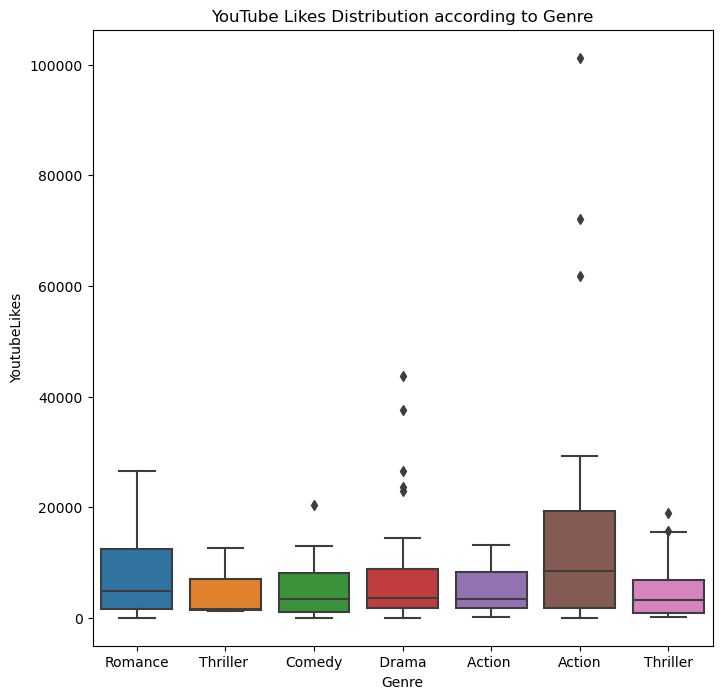

In [112]:
#Question 10
plt.figure(figsize = (8, 8))
sns.boxplot(x = 'Genre', y = 'YoutubeLikes', data = df2)
plt.title("YouTube Likes Distribution according to Genre")
plt.show()

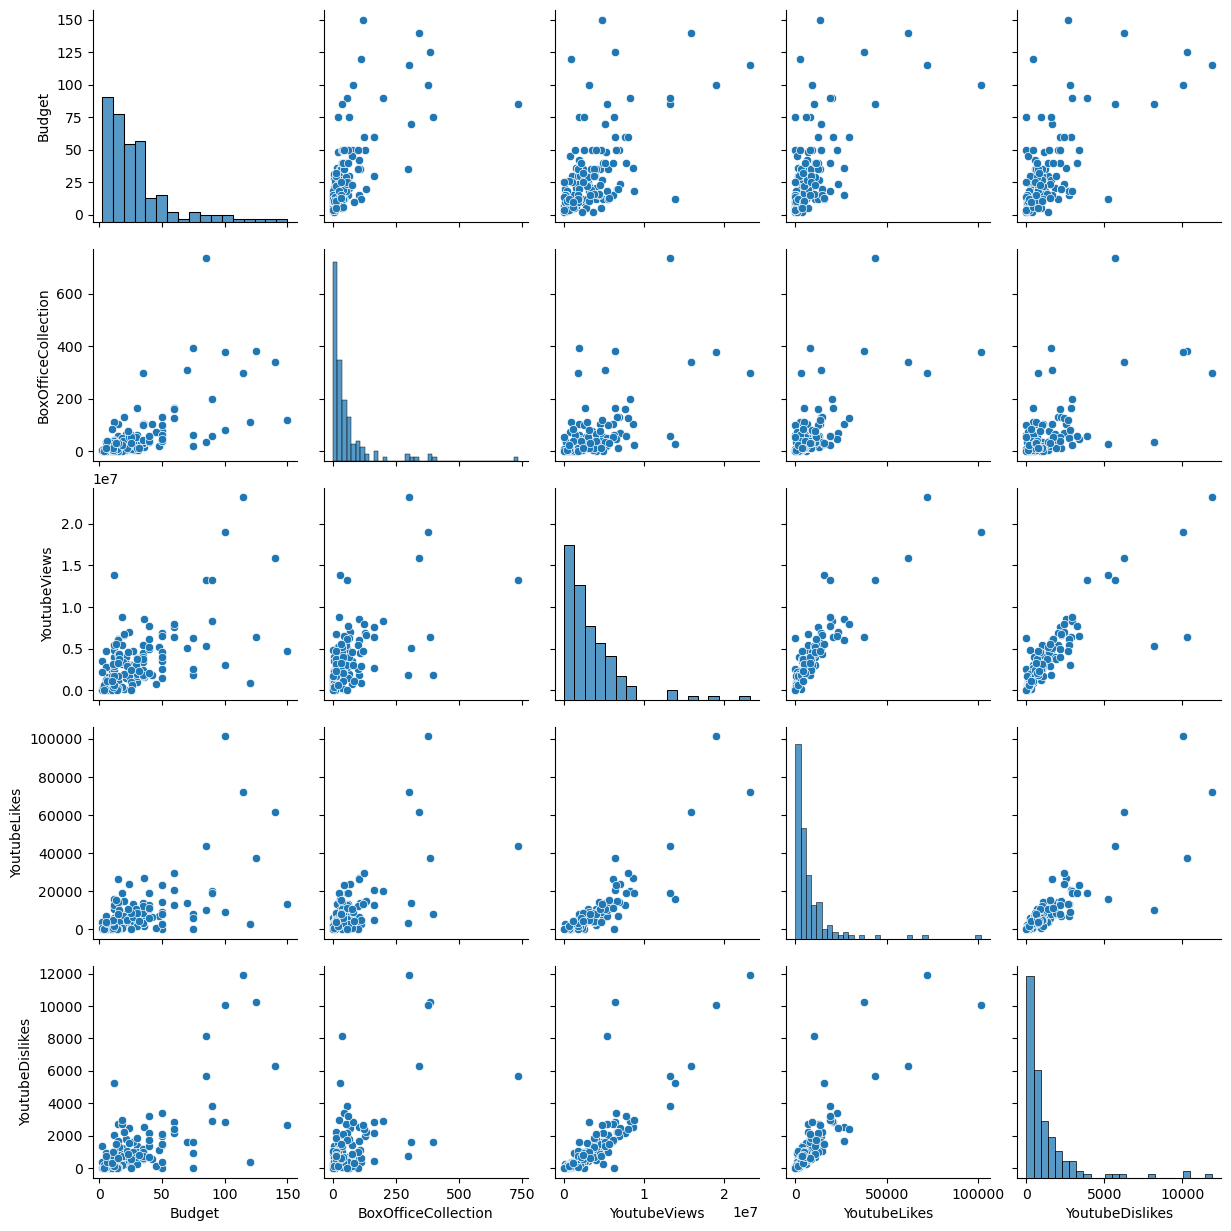

In [113]:
#Question 11
sns.pairplot(df2[['Budget', 'BoxOfficeCollection', 'YoutubeViews','YoutubeLikes', 'YoutubeDislikes']])
plt.show()

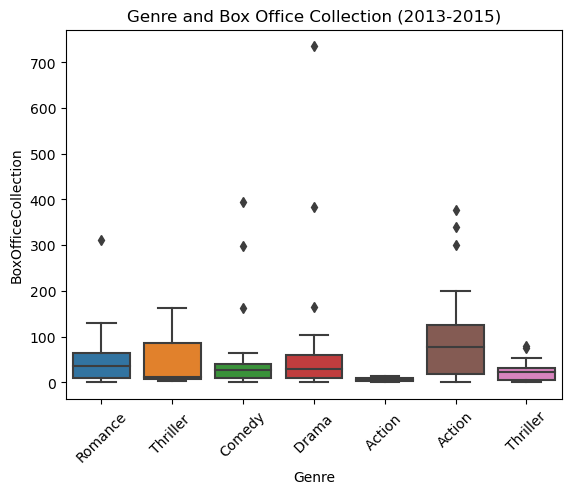

In [114]:
#Question 12
df2['ReleaseYear'] = pd.to_datetime(df2['Release Date'], errors='coerce').dt.year
movies_2013_2015 = df2[(df2['ReleaseYear'] >= 2013) & (df2['ReleaseYear'] <= 2015)]
sns.boxplot(x='Genre', y='BoxOfficeCollection', data=movies_2013_2015)
plt.xticks(rotation=45)
plt.title('Genre and Box Office Collection (2013-2015)')
plt.show()

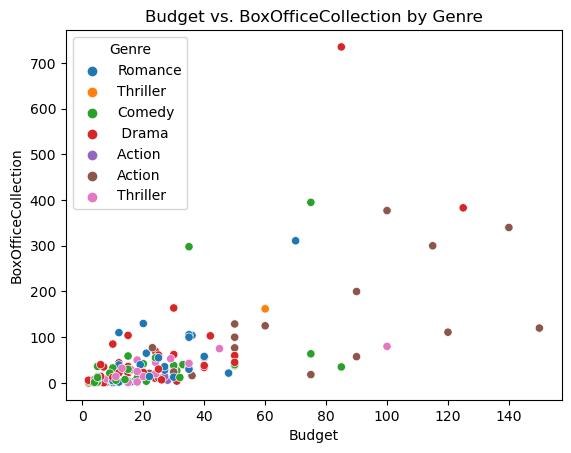

In [115]:
#Question 13
sns.scatterplot(x='Budget', y='BoxOfficeCollection', hue='Genre', data=df2)
plt.title('Budget vs. BoxOfficeCollection by Genre')
plt.show()

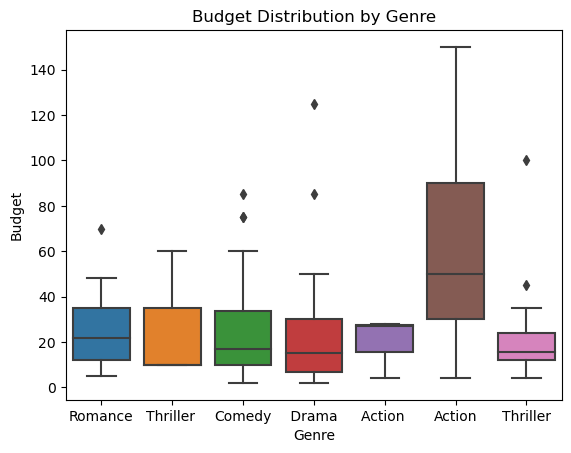

In [116]:
#Question 14
sns.boxplot(x = 'Genre', y = 'Budget', data = df2)
plt.title('Budget Distribution by Genre')
plt.show()

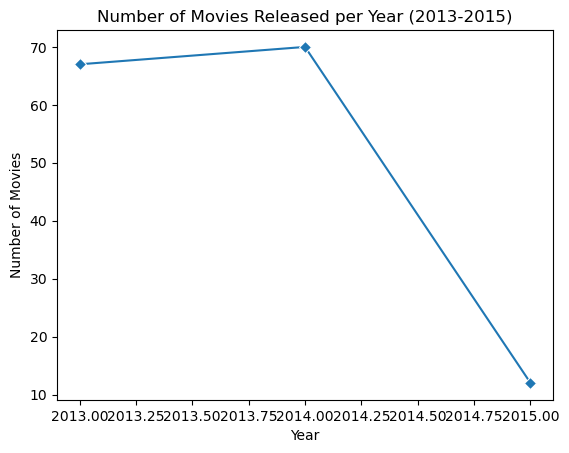

In [119]:
#Question 15
movies_per_year = df2['ReleaseYear'].value_counts().sort_index()
movies_per_year
sns.lineplot(x=movies_per_year.index, y=movies_per_year.values, marker='D')
plt.title('Number of Movies Released per Year (2013-2015)')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()